In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import joblib
import h5py


import matplotlib.pyplot as plt

In [42]:
data_path = r'C:\Users\82102\Desktop\work'

df=pd.read_csv('C:\\Users\\82102\\Desktop\\work\\data\\data_vibration.csv')

X = df[['cb_data_vib_x','cb_data_vib_y','cb_data_vib_z']]
y = df['Action Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_save_model(X_train, y_train, model_save_path):
    # RandomForestClassifier 모델 초기화 및 학습
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # 모델 저장
    joblib.dump(model, model_save_path)

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)

    # 정확도 및 분류 보고서 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

def model_to_h5(model_save_path, h5_save_path):
    # 모델 불러오기
    model = joblib.load(model_save_path)

    # H5 파일로 저장
    with h5py.File(h5_save_path, 'w') as hf:
        for key, value in model.__dict__.items():
            try:
                hf.create_dataset(key, data=value)
            except TypeError:
                pass


# 모델 학습 및 저장
model_save_path = r'C:\Users\82102\Desktop\your_model.joblib'  # 실제 경로로 변경
train_and_save_model(X_train, y_train, model_save_path)

# 모델을 H5 파일로 저장
h5_save_path = r'C:\Users\82102\Desktop\your_model.h5'  # 실제 경로로 변경
model_to_h5(model_save_path, h5_save_path)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

None Sliding       1.00      1.00      1.00       705
Rail Sliding       1.00      1.00      1.00        81

    accuracy                           1.00       786
   macro avg       1.00      1.00      1.00       786
weighted avg       1.00      1.00      1.00       786



In [9]:
# data_path = 'C:\\Users\\82102\\Desktop\\work'
# folder_path = ['data']

# df_list = []

# for folder in folder_path:
#     full_path = os.path.join(data_path, folder)
#     files = os.listdir(full_path)



#     for file in files:
#         # with open(full_path, 'r', encoding='utf-8') as file:
#         file_path = os.path.join(full_path, file)
        

#         # "Data Length" 행부터 시작해서 10개 주기로 데이터를 끊어와서 첫 번째 열만 선택
#         # temp_df = pd.read_csv(file_path, skiprows=lambda x: x < 8 or (x - 8) % 10 != 1, usecols=[1])
#         temp_df = pd.read_csv(file_path, skiprows=lambda x: x < 8, usecols=[1])
        
#         df_list.append(df)

# x_label_df = pd.concat(df_list, axis=1)
# x_normal = x_label_df.iloc[1562:4051, :1] # Unloading : 1~122
# print(x_normal)
# x_error = x_label_df.iloc[4052:6543, :1]
# print(x_error)

# print(x_normal.shape)
# print(x_error.shape)


           sound
1562  341.057751
1563  333.354439
1564  342.250305
1565  344.841217
1566  339.172655
...          ...
4046  343.341286
4047  345.826375
4048  347.498667
4049  344.623032
4050  349.594035

[2489 rows x 1 columns]
           sound
4052  340.976211
4053  349.959741
4054  358.523256
4055  363.151691
4056  364.643733
...          ...
6536  599.158989
6537  599.852269
6538  599.132790
6539  602.124314
6540  604.000000

[2489 rows x 1 columns]
(2489, 1)
(2489, 1)


In [10]:
# train_num = 1200
# valid_num = 400
# test_num = 400

# # 0 -> normal, 1-> error 
# x_train = np.concatenate([x_normal.iloc[:, :train_num], x_error.iloc[:, :train_num]], axis=1)
# y_train = np.concatenate([np.zeros(train_num), np.ones(train_num)], axis=0)
# x_valid = np.concatenate([x_normal.iloc[:, train_num:train_num+valid_num], x_error.iloc[:, train_num:train_num+valid_num]], axis=1)
# y_valid = np.concatenate([np.zeros(valid_num), np.ones(valid_num)], axis=0)
# x_test = np.concatenate([x_normal.iloc[:, train_num+valid_num:], x_error.iloc[:, train_num+valid_num:]], axis=1)
# y_test = np.concatenate([np.zeros(test_num), np.ones(test_num-293)], axis=0)

# print(x_train.shape, x_valid.shape, x_test.shape)
# print(y_train.shape, y_valid.shape, y_test.shape)

# x_train = x_train.T
# x_valid = x_valid.T
# x_test = x_test.T
# print(x_train.shape, x_valid.shape, x_test.shape)

# # x_train = np.concatenate([x_normal.iloc[:, :train_num], x_error.iloc[:, :train_num]], axis=0)
# # y_train = np.concatenate([np.zeros(train_num), np.ones(train_num)], axis=0)
# # x_valid = np.concatenate([x_normal.iloc[:, train_num:train_num+valid_num], x_error.iloc[:, :train_num+valid_num]], axis=0)
# # y_valid = np.concatenate([np.zeros(valid_num), np.ones(valid_num)], axis=0)
# # x_test = np.concatenate([x_normal.iloc[train_num+valid_num:, :], x_error.iloc[train_num+valid_num:, :2000]], axis=0)
# # y_test = np.concatenate([np.zeros(test_num), np.ones(test_num)], axis=0)

# train_num = len(x_train)
# valid_num = len(x_valid)
# test_num = len(x_test)

# train_indices = np.arange(train_num)
# valid_indices = np.arange(valid_num)
# test_indices = np.arange(test_num)

# np.random.shuffle(train_indices)
# np.random.shuffle(valid_indices)
# np.random.shuffle(test_indices)

# x_train = x_train[train_indices]
# y_train = y_train[train_indices]

# x_test = x_test[test_indices]
# y_test = y_test[test_indices]

# x_valid = x_valid[valid_indices]
# y_valid = y_valid[valid_indices]

# mean = x_train.mean(axis=0)
# std = x_train.std(axis=0)

# x_train_normalized = (x_train - mean) / std
# x_valid_normalized = (x_valid - mean) / std
# x_test_normalized = (x_test - mean) / std

(2489, 2) (2489, 0) (2489, 0)
(2400,) (800,) (507,)
(2, 2489) (0, 2489) (0, 2489)


In [73]:
# optimizer = Adam(learning_rate=0.001)

In [74]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from tensorflow.keras.optimizers import Adam

# model = Sequential(
#     [
#         Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(12000, 1)),
#         MaxPooling1D(pool_size=2),
#         Flatten(),
#         Dense(units=128, activation='relu'),
#         Dense(units=2, activation='softmax'),  # Assuming it's a binary classification
#     ]
# )

# model.compile(
#     optimizer=Adam(learning_rate=1e-3),
#     loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
#     metrics=['accuracy'],
# )

# # 데이터 형태 조정
# x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], 1))
# x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 정확도 그래프
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/10


ValueError: in user code:

    File "c:\Users\82102\anaconda3\envs\tinyml\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\82102\anaconda3\envs\tinyml\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\82102\anaconda3\envs\tinyml\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\82102\anaconda3\envs\tinyml\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\82102\anaconda3\envs\tinyml\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\82102\anaconda3\envs\tinyml\lib\site-packages\keras\engine\input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 12000, 1), found shape=(None, 2489, 1)


Epoch 1/200
120/120 [==============================] - 1s 7ms/step - loss: 1.0896 - categorical_accuracy: 0.4984 - val_loss: 1.0394 - val_categorical_accuracy: 0.4917
Epoch 2/200
120/120 [==============================] - 1s 5ms/step - loss: 1.0521 - categorical_accuracy: 0.4990 - val_loss: 1.0272 - val_categorical_accuracy: 0.4792
Epoch 3/200
120/120 [==============================] - 1s 5ms/step - loss: 1.0239 - categorical_accuracy: 0.4995 - val_loss: 1.0154 - val_categorical_accuracy: 0.4771
Epoch 4/200
120/120 [==============================] - 0s 3ms/step - loss: 0.9981 - categorical_accuracy: 0.5005 - val_loss: 1.0086 - val_categorical_accuracy: 0.4771
Epoch 5/200
120/120 [==============================] - 1s 7ms/step - loss: 0.9761 - categorical_accuracy: 0.5000 - val_loss: 1.0038 - val_categorical_accuracy: 0.4854
Epoch 6/200
120/120 [==============================] - 1s 5ms/step - loss: 0.9579 - categorical_accuracy: 0.4974 - val_loss: 1.0007 - val_categorical_accuracy: 0.487

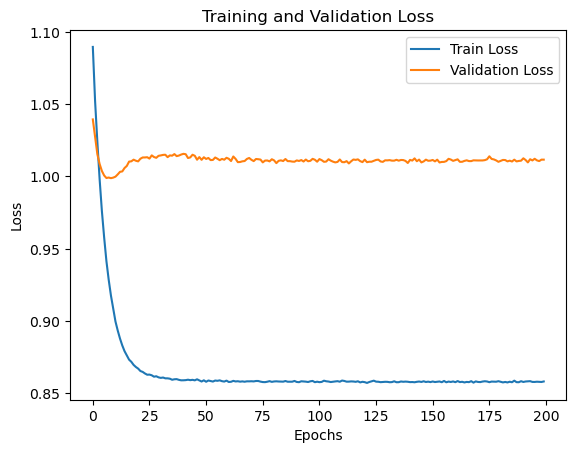

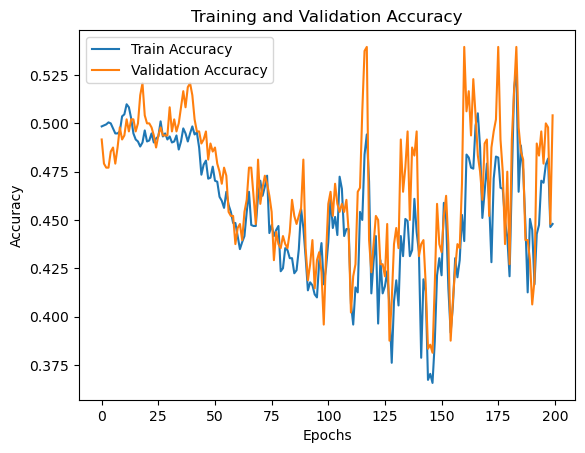

16/16 [==============================] - 0s 3ms/step - loss: 0.9978 - categorical_accuracy: 0.4556
Test Loss: 0.9978073835372925, Test Accuracy: 0.45562130212783813


In [4]:
# # accuracy 폭망
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers.experimental import RandomFourierFeatures

# model = Sequential(
#     [
#         layers.Input(shape=(12000,)),
#         RandomFourierFeatures(
#             output_dim=128, scale=0.1, kernel_initializer="gaussian"
#         ),
#         layers.Flatten(),
#         layers.Dense(units=2),
#     ]
# )

# model.compile(
#     optimizer=Adam(learning_rate=1e-3),
#     loss='hinge',
#     metrics=['categorical_accuracy'],
# )

# # # 데이터 정규화
# # x_train = (x_train - x_train.mean()) / x_train.std()
# # x_valid = (x_valid - x_valid.mean()) / x_valid.std()

# # 모델 훈련
# history = model.fit(x_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 정확도 그래프
# plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [11]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # SVM 모델 초기화
# svm_model = SVC(kernel='linear')  # 선형 커널 사용, 복잡한 경우에는 다른 커널 사용 가능

# # 데이터 학습
# svm_model.fit(x_train, y_train)

# # 훈련 및 검증 세트에 대한 예측
# train_pred = svm_model.predict(x_train)
# valid_pred = svm_model.predict(x_valid)

# # 정확도 출력
# train_accuracy = accuracy_score(y_train, train_pred)
# valid_accuracy = accuracy_score(y_valid, valid_pred)

# print(f'Training Accuracy: {train_accuracy}')
# print(f'Validation Accuracy: {valid_accuracy}')


ValueError: The number of classes has to be greater than one; got 1 class

In [12]:
# import lightgbm as lgb

# d_train = lgb.Dataset(x_train, label=y_train)
# params = {}
# params['learning_rate'] = 0.001
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 20
# params['min_data'] = 50
# params['max_depth'] = 10
# clf = lgb.train(params, d_train, 100)

# clf.save_model('model.txt')

# y_pred=clf.predict(x_valid)

# for i in range(0,99):
#     if y_pred[i]>=.5:      
#        y_pred[i]=1
#     else:  
#        y_pred[i]=0

# y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

# # Confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_valid, y_pred_binary)

# # Accuracy
# accuracy = accuracy_score(y_pred_binary, y_valid)

# print(cm)
# print(accuracy)



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 2
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

IndexError: index 0 is out of bounds for axis 0 with size 0

In [73]:
# data_list = []

# data1 = "D:\\Dataset\\#2_error detection\\기계시설물 고장 예지 센서\\Validation\\vibration\\vibration\\2.2kW\\dataset\\정상\\STFMK-20201105-LW15-2055_20201125_141245_004.csv"
# data2 = "D:\\Dataset\\#2_error detection\\기계시설물 고장 예지 센서\\Validation\\vibration\\vibration\\2.2kW\\dataset\\정상\\STFMK-20201105-LW15-2055_20201125_141309_004.csv"
# data3 = "D:\\Dataset\\#2_error detection\\기계시설물 고장 예지 센서\\Validation\\vibration\\vibration\\2.2kW\\dataset\\벨트느슨함\\STFMK-20201105-LW19-3456_20201128_090128_004.csv"

# data_list.append(data1)
# data_list.append(data2)
# data_list.append(data3)


# for data_path in data_list:
#     print(os.path.basename(data_path))
#     data = pd.read_csv(data_path, skiprows=lambda x: x < 8, usecols=[1])
#     data = data.T

#     prediction = clf.predict(data)
#     if prediction > 0.5 :
#         print("벨트 느슨함")
#     else:
#         print("정상")

STFMK-20201105-LW15-2055_20201125_141245_004.csv
정상
STFMK-20201105-LW15-2055_20201125_141309_004.csv
정상
STFMK-20201105-LW19-3456_20201128_090128_004.csv
벨트 느슨함


In [ ]:
# # LSTM 모델 훈련
# model = Sequential()
# model.add(SimpleRNN(units=100, activation='relu', input_shape=(1199, 1)))
# model.add(Dense(units=1, activation='sigmoid'))

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_valid, y_valid))

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# # Build the RNN model
# model = Sequential()
# model.add(SimpleRNN(units=50, activation='relu', input_shape=(12000, 1)))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # LSTM 모델 훈련
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 정확도 그래프
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# # Build the RNN model with GRU
# model = Sequential()
# model.add(GRU(units=200, activation='relu', input_shape=(12000, 1)))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # GRU 모델 훈련
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# # 손실 그래프
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# # 정확도 그래프
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy') 
# plt.legend()
# plt.show()

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')